In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


In [ ]:
def compute_histogram(image, is_gray=False):
    if is_gray:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    else:
        hist = [cv2.calcHist([image], [i], None, [256], [0, 256]) for i in range(3)]
    return hist

def plot_histogram(hist, title, color=None):
    plt.figure()
    plt.title(title)
    plt.xlabel('Intensity Value')
    plt.ylabel('Pixel Count')
    if color:
        for h, c in zip(hist, color):
            plt.plot(h, color=c)
    else:
        plt.plot(hist, color='black')
    plt.xlim([0, 256])
    plt.show()


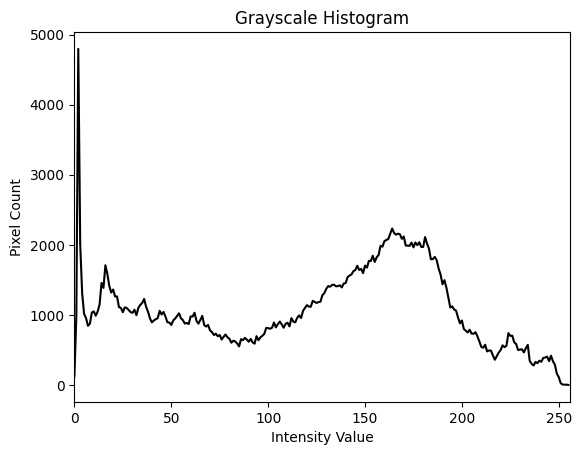

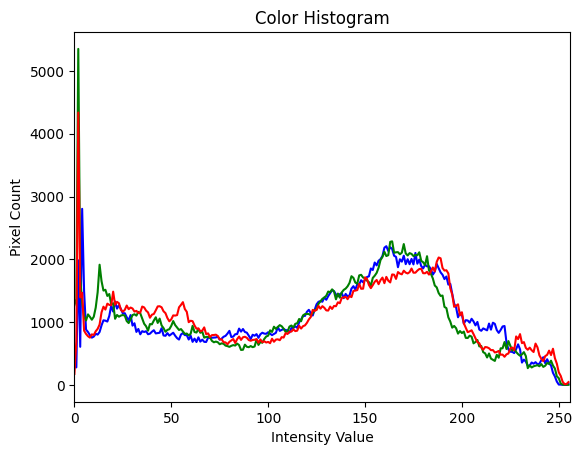

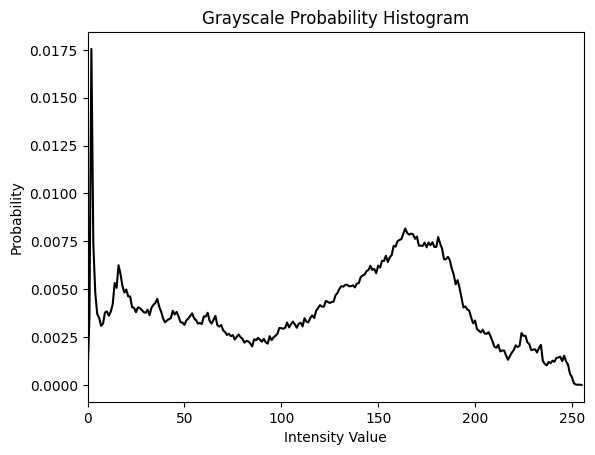

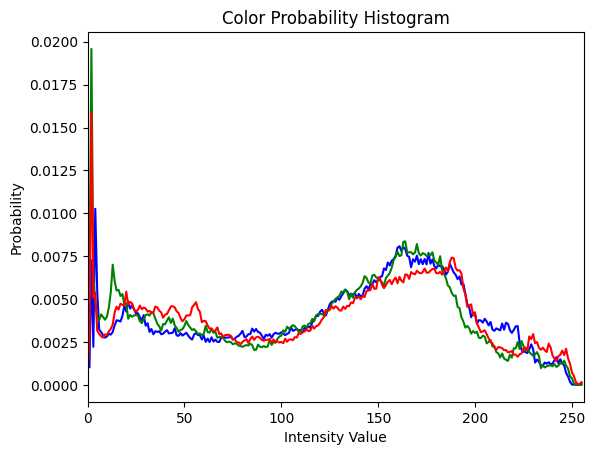

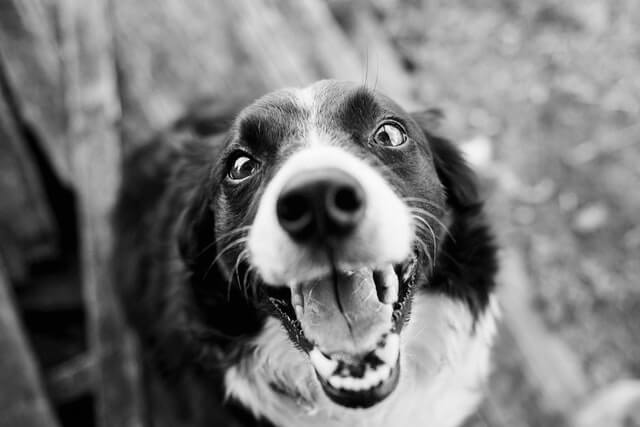

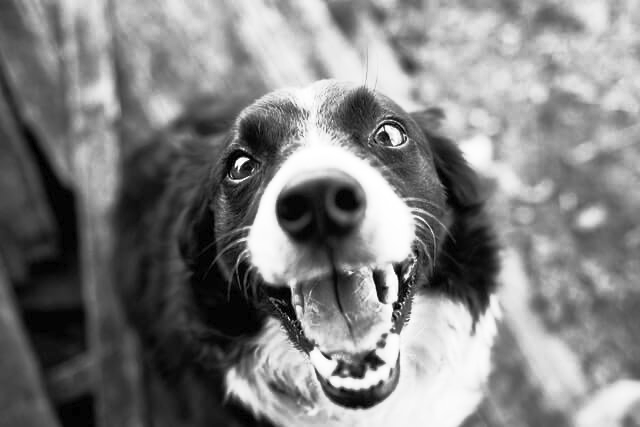

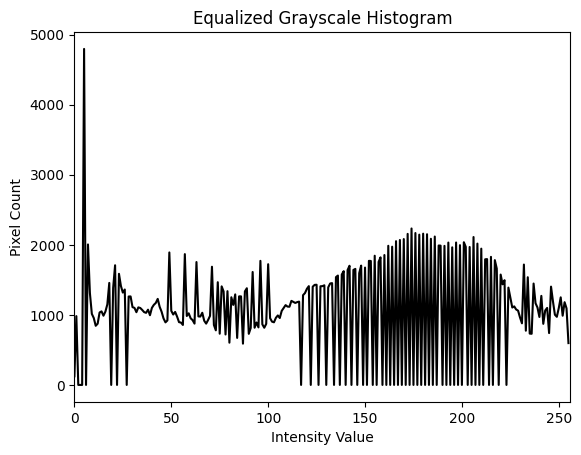

In [ ]:
def plot_probability_histogram(hist, title, color=None):
    plt.figure()
    plt.title(title)
    plt.xlabel('Intensity Value')
    plt.ylabel('Probability')
    if color:
        for h, c in zip(hist, color):
            plt.plot(h / np.sum(h), color=c)
    else:
        plt.plot(hist / np.sum(hist), color='black')
    plt.xlim([0, 256])
    plt.show()

def histogram_equalization(image):
    return cv2.equalizeHist(image)

def process_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found or unable to load.")
        return

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    hist_gray = compute_histogram(gray_image, is_gray=True)
    hist_color = compute_histogram(image, is_gray=False)

    plot_histogram(hist_gray, 'Grayscale Histogram')
    plot_histogram(hist_color, 'Color Histogram', color=['b', 'g', 'r'])

    plot_probability_histogram(hist_gray, 'Grayscale Probability Histogram')
    plot_probability_histogram(hist_color, 'Color Probability Histogram', color=['b', 'g', 'r'])

    equalized_image = histogram_equalization(gray_image)
    cv2_imshow(gray_image)
    cv2_imshow(equalized_image)

    hist_equalized = compute_histogram(equalized_image, is_gray=True)
    plot_histogram(hist_equalized, 'Equalized Grayscale Histogram')

# Example usage
process_image('/content/rgb_image.jpg')  # Replace with your image path


In [ ]:
def compute_fft(image):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)  # Avoid log(0)
    return dft, dft_shift, magnitude_spectrum

def compute_ifft(dft):
    dft_ishift = np.fft.ifftshift(dft)
    reconstructed_image = np.fft.ifft2(dft_ishift)
    return np.abs(reconstructed_image)

def rotate_image(image, angle):
    (h, w) = image.shape
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

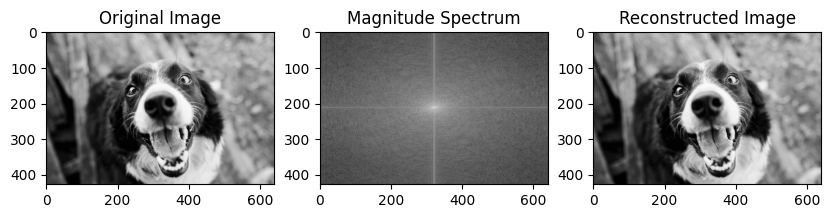

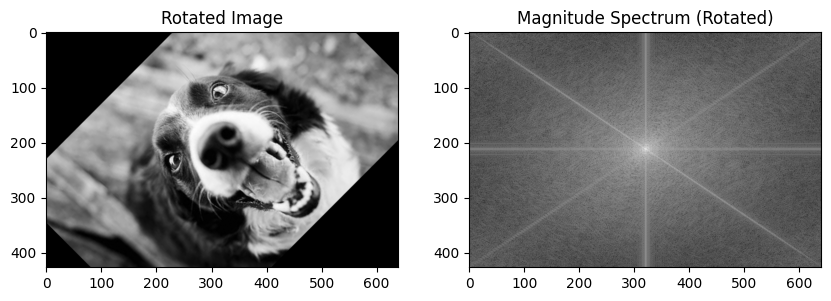

In [ ]:
def process_fft(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Image not found or unable to load.")
        return

    dft, dft_shift, magnitude_spectrum = compute_fft(image)
    reconstructed_image = compute_ifft(dft)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.subplot(1, 3, 2), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Magnitude Spectrum')
    plt.subplot(1, 3, 3), plt.imshow(reconstructed_image, cmap='gray'), plt.title('Reconstructed Image')
    plt.show()

    rotated_image = rotate_image(image, 45)
    _, _, magnitude_spectrum_rotated = compute_fft(rotated_image)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1), plt.imshow(rotated_image, cmap='gray'), plt.title('Rotated Image')
    plt.subplot(1, 2, 2), plt.imshow(magnitude_spectrum_rotated, cmap='gray'), plt.title('Magnitude Spectrum (Rotated)')
    plt.show()

# Example usage
process_fft('/content/rgb_image.jpg')  # Replace with your image path
